# 2.1 - Testeo de hipótesis

##### Recordatorio


+ Población => Todos los elementos (normalmente desconocido)
+ Muestra => Subconjunto de la población


**Método Científico**

![scientific_method](images/scientific_method.jpeg)

# Hipotesis

+ **H0**

Hipótesis nula. (H0). H0 es el status quo, el mainstream, la hipótesis a vencer por el investigador.


+ **H1**

Hipótesis alternativa. (H1). H1 es la nueva hipótesis, la del investigador.

# Tipos de tests

**1)** (one-side)

$$H0: \mu \geq k$$
$$H1: \mu < k$$

**2)** (one-side)

$$H0: \mu \leq k$$
$$H1: \mu > k$$

**3)** (two-side)

$$H0: \mu = k$$
$$H1: \mu ≠ k$$

# Suposiciones para el testeo

**1)**

Observaciones independientes. (Para evitar sesgos)

**2)**

Normalidad de los datos. ($N(\mu, \sigma)$)

Teorema Central del Limite (minimo tamaño de la muestra = 30)

**3)**

Tamaño adecuado de la muestra y representatividad de dicha muestra. 

**Tamaño de la muestra**

https://es.wikipedia.org/wiki/Tama%C3%B1o_de_la_muestra

**4)**

Para usar la $N(\mu, \sigma)$, debemos conocer $\sigma$ (desviacion estandar de la poblacion).Si $\sigma$ es desconocida, se usa la t-Student para el testeo de hipotesis, lo que implica usar s (desviacion estandar muestral, n-1).

# Test (estadistico)

+ $N(\mu, \sigma)$ , $Z-test$

$$z=\frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $\sigma$ es la std poblacional
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{\sigma}{\sqrt{n}}$ se le llama error estandar

+ t-Student , $t-test$

$$t=\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$$

donde:
+ $\bar{x}$ es la media muestral
+ $\mu$ es la media poblacional
+ $s$ es la std muestral
+ $\sqrt{n}$ es la raiz de n=tamaño de la muestra
+ $\frac{s}{\sqrt{n}}$ se le llama error estandar muestral

# P-value

**p-value** = es la probabilidad correspondiente al estadistico de ser posible bajo H0.

$$pvalue > umbral => H0$$
$$pvalue < umbral => H1$$

El umbral esta determinado por el intervalo de confianza.

In [1]:
import pylab as plt

from scipy.stats import norm

In [2]:
x=[i*.1 for i in range(-60, 60)]

y1=[norm.pdf(x, -2, 1) for x in x]
y2=[norm.pdf(x, 2, 1) for x in x]

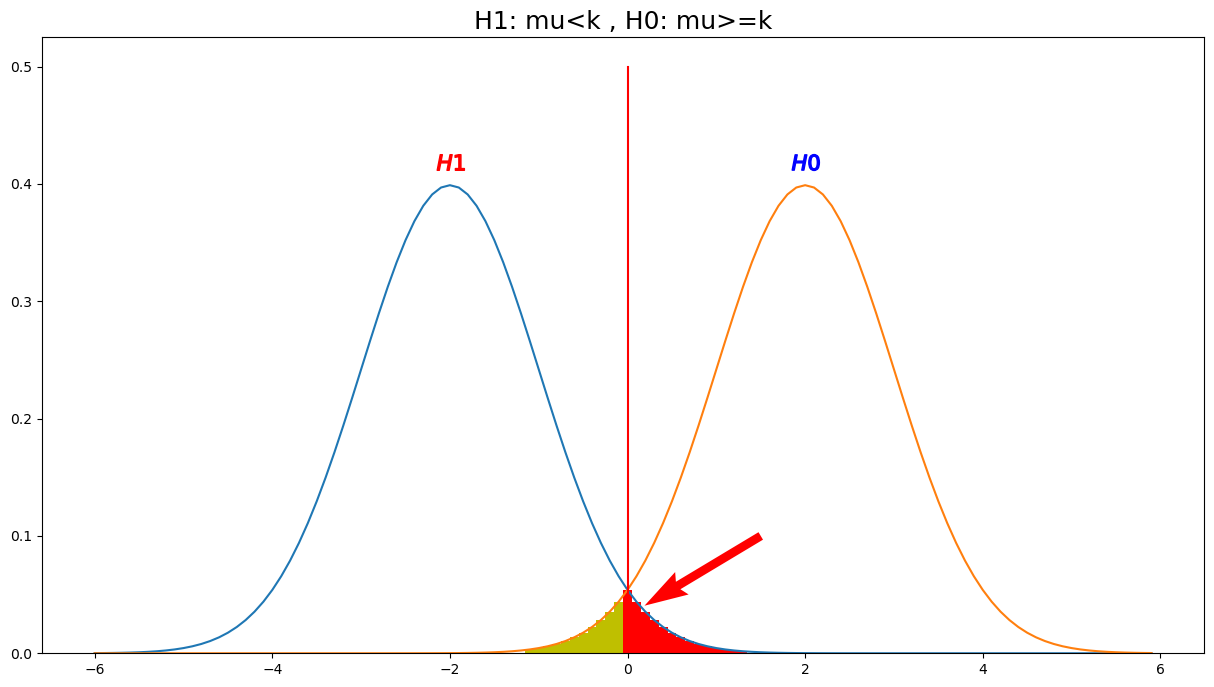

In [3]:
%matplotlib inline

plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H1$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H0$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(49, 74):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
    else:
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu<k , H0: mu>=k', fontsize=18);

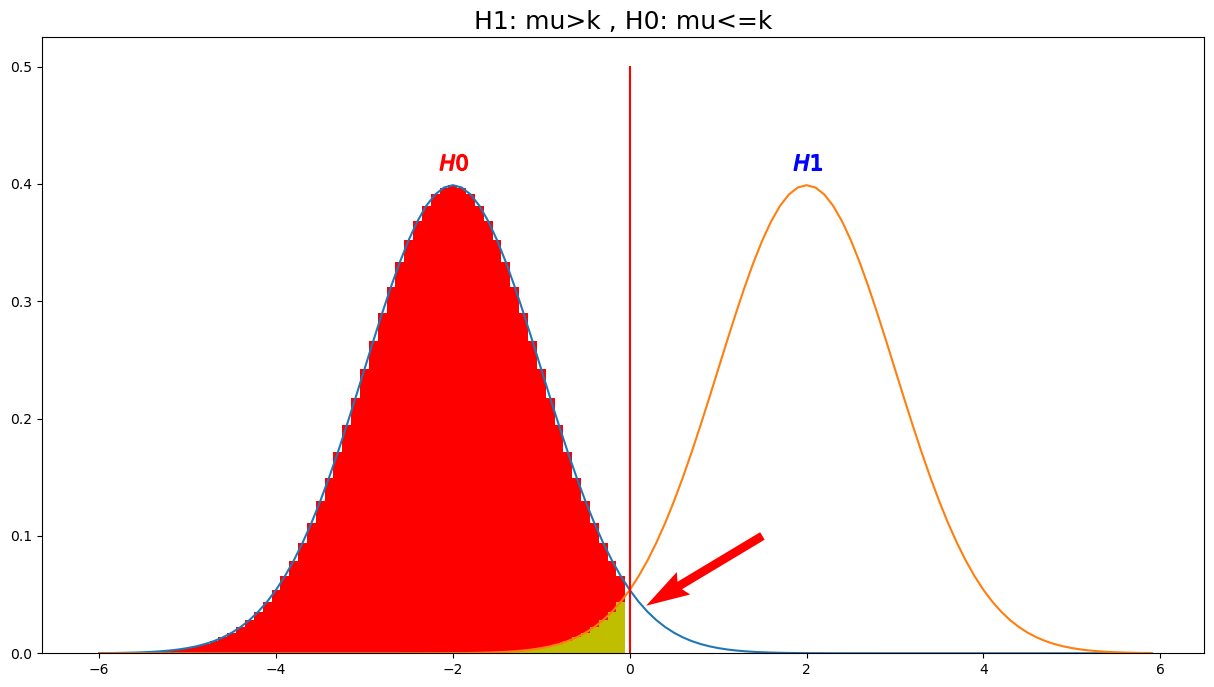

In [4]:
plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.1, -1, -0.6, color='r', scale=10)  # para pintar una flecha

for i in range(74):
    if y1[i]>y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        plt.bar(x[i], y2[i], width=0.1, color='y')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu>k , H0: mu<=k', fontsize=18);

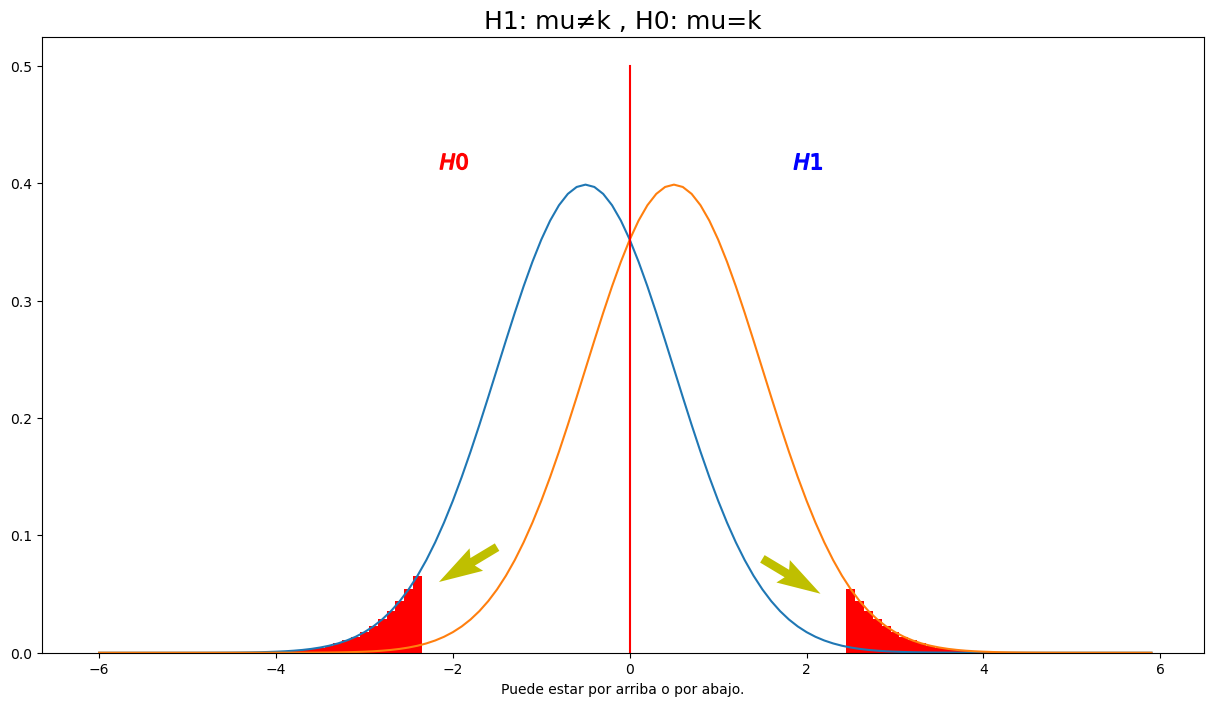

In [5]:
y1=[norm.pdf(x, -.5, 1) for x in x]
y2=[norm.pdf(x, .5, 1) for x in x]

plt.figure(figsize=(15, 8))
plt.plot(x, y1)
plt.plot(-2, max(y1)+.02, marker='$H0$', color='red', ms=20)
plt.plot(x, y2)
plt.plot(2, max(y2)+.02, marker='$H1$', color='blue', ms=20)

plt.quiver(1.5, 0.08, 1, -0.6, color='y', scale=20)  # para pintar una flecha
plt.quiver(-1.5, 0.09, -1, -0.6, color='y', scale=20)

for i in range(85, 100):
    if y1[i]<=y2[i]:
        plt.bar(x[i], y2[i], width=0.1, color='r')

for i in range(37):
    if y1[i]>=y2[i]:
        plt.bar(x[i], y1[i], width=0.1, color='r')
        
plt.plot([0,0], [0, 0.5], color='r')
plt.title('H1: mu≠k , H0: mu=k', fontsize=18)
plt.xlabel('Puede estar por arriba o por abajo.');

# Ejemplo estudio farmaceutico

Supongamos que una compañia farmaceutica crea un medicamento para manejar la diabetes.

Se sabe que cualquier nivel de hemoglobina A1c por debajo del 5,7% es considerado normal.
La compañia realiza un estudio de un nuevo medicamento con 100 voluntarios.

+ Hipotesis:
$$H0: \mu \geq 5.7$$
$$H1: \mu < 5.7$$


Los resultados del estudio son $\bar{x}=5.1$, $s=1.6$


¿La prueba es suficiente para rechazar H0?

In [1]:
import numpy as np

from scipy.stats import t

In [2]:
# a manita


mu = 5.7       # media poblacional

mu_hat = 5.1   # media muestral, media del estudio

std_hat = 1.6   # std muestral, std del estudio

n=100         # tamalo de la muestra

In [3]:
t_test = (mu_hat - mu) / (std_hat/np.sqrt(n))

t_test

-3.750000000000003

In [4]:
# grados de libertad, tenemos una muestra de valores independientes

dof = n-1   

dof

99

In [5]:
p_value = t(df=dof).cdf(t_test)

p_value

0.0001489332089038242

In [6]:
# lo mismo...o casi

from scipy.stats import ttest_1samp

In [16]:
# son los datos, esto sale del dataframe, creando datos fake

# luego aqui van los datos

pacientes=np.random.normal(mu_hat, std_hat, n)

pacientes[:10]

array([4.66774757, 7.57466937, 5.33838802, 6.09067113, 3.74164603,
       4.91608469, 4.28715953, 1.40750914, 2.80198316, 4.2357792 ])

In [17]:
#help(np.random.normal)

In [18]:
#help(ttest_1samp)

In [24]:
t_test = ttest_1samp(pacientes, mu, alternative='less')

t_test

Ttest_1sampResult(statistic=-5.178216981689271, pvalue=5.893761614007348e-07)

In [20]:
t_test.statistic

-5.178216981689271

In [21]:
t_test.pvalue

5.893761614007348e-07

**Conclusion:**

Si buscamos un intervalo de confianza del 99,9%, entonces $umbral=0.001$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Ejemplo Altura

Estudio media altura humana, 100 individuos.

+ Hipotesis:
$$H0: \mu \leq 1.7$$
$$H1: \mu > 1.7$$


Los resultados del estudio son $\bar{x}=1.72$, $s=0.2$


¿La prueba es suficiente para rechazar H0?

In [25]:
t_test = (1.72 - 1.7) / (0.2/np.sqrt(100))

p_value = 1 - t(df=99).cdf(t_test)

p_value

0.15987423706965065

In [32]:
# con scipy

t_test=ttest_1samp(np.random.normal(1.72, 0.2, 100),  # datos fake, aqui irian los datos 
                   1.7,                        # media a comparar, lo que me dan
                   alternative='greater'  # H1 > k
                  )

t_test

Ttest_1sampResult(statistic=1.3334052295622827, pvalue=0.09272942549292328)

In [33]:
t_test.pvalue

0.09272942549292328

**Conclusion**

Si buscamos un intervalo de confianza del 95%, entonces $umbral=0.05$

El pvalor obtenido es mayor que el umbral, por lo tanto no podemos rechazar H0.

**OJO**

Si buscamos un intervalo de confianza del 80%, entonces $umbral=0.2$

El pvalor obtenido es menor que el umbral, por lo tanto podemos rechazar H0.

# Z-test  

$N(\mu, \sigma)$

supongamos $\sigma=0.25$ , std de la poblacion

In [ ]:
%pip install statsmodels

In [34]:
from statsmodels.stats import weightstats as w    # el alias es mio

In [35]:
datos_fake=np.random.normal(1.72, 0.25, 100)   # 0.25 es la std poblacional

In [36]:
z_score, p_value = w.ztest(datos_fake,
                           value=1.7,
                           alternative='smaller')

z_score, p_value

(0.3672431694928637, 0.6432811795413624)

In [ ]:
#help(w.ztest)

In [37]:
z_score = (1.72 - 1.7) / (0.25/np.sqrt(100))

z_score

0.8000000000000007

In [38]:
from scipy.stats import norm

p_value = norm().cdf(z_score)   

p_value

0.7881446014166036

# Testeo de hipotesis con 2 muestras

Ya no se estudia una muestra frente a la poblacion, sino que se comparan dos muestras entre si.

En primer lugar, se considera la diferencia de medias:

$$\mu=\mu_1 - \mu_2$$

El tipo de test cambia:

**1)** 

$$H0: \mu \geq 0$$
$$H1: \mu < 0$$
    
    
**2)** 

$$H0: \mu \leq 0$$
$$H1: \mu > 0$$
    
    
**3)** 

$$H0: \mu = 0$$
$$H1: \mu ≠ 0$$

Por otro lado hay que considerar la independencia de las muestras.

Si son dependientes (matched pairs), entonces se usa el t-test:

+ Welch's t-test


$$t=\frac{\bar{x_1} - \bar{x_2}}{\sqrt{\frac{s_1^2}{n_1^2}+\frac{s_2^2}{n_2^2}}}$$

**Hipotesis**

$H0: \mu=0$    (media de las diferencias), (no hay diferencia significativa entre las muestras)

$H1: \mu≠0$   (existe una diferencia significativa entre las muestras)

**Conclusion**

El p_Value tiende a cero. Podemos rechazar H0.

### muestras independientes


**Conclusion**

El p_value es menor que el umbral, dependiendo del intervalo de confianza, pero siendo asi podemos rechazar H0, y decir que existe una diferencia significativa entre ambas muestras, una pagina web funciona mejor que otra.

## Normalidad - Test de Shapiro

**H0: es Normal**


**H1 : NO es Normal**

**normalizando**

**Intervalos de confianza**

**test de proporciones**